In [ ]:
# Yhdistetään Driveen
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/data

# Perusimportit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML-importit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/data


# Osa 1 - luokittelumallit
Käytetään tässä osiossa aineistoa, joka sisältää asiakkaan ostopäätöksen lisäksi palkan ja oleellisia kategorisia muuttujia.

In [ ]:
# Pudotetaan samalla aineistosta pois rivinumerosarake,
# jota emme tarvitse (Observation number), ja mahdolliset puuttuvat arvot
df = pd.read_excel("KidCreative.xlsx").drop(["Obs No."], axis=1).dropna()
df

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,0,27000,1,0,0,0,0,0,6,0,1,1,1,1,1,0,0
669,0,3000,1,0,0,0,0,0,11,0,1,0,1,0,1,0,0
670,1,75000,1,1,0,1,0,0,52,0,0,1,1,1,1,0,0
671,1,51000,1,1,0,1,0,0,10,1,1,1,1,1,1,0,0


In [ ]:
# Ostopäätöksen tehneiden jakauma
df["Buy"].value_counts()

Buy
0    548
1    125
Name: count, dtype: int64

In [ ]:
# Prosenteissa
print(f"Ostopäätöksen tehneitä {125/(548+125)*100:.2f} prosenttia.")

Ostopäätöksen tehneitä 18.57 prosenttia.


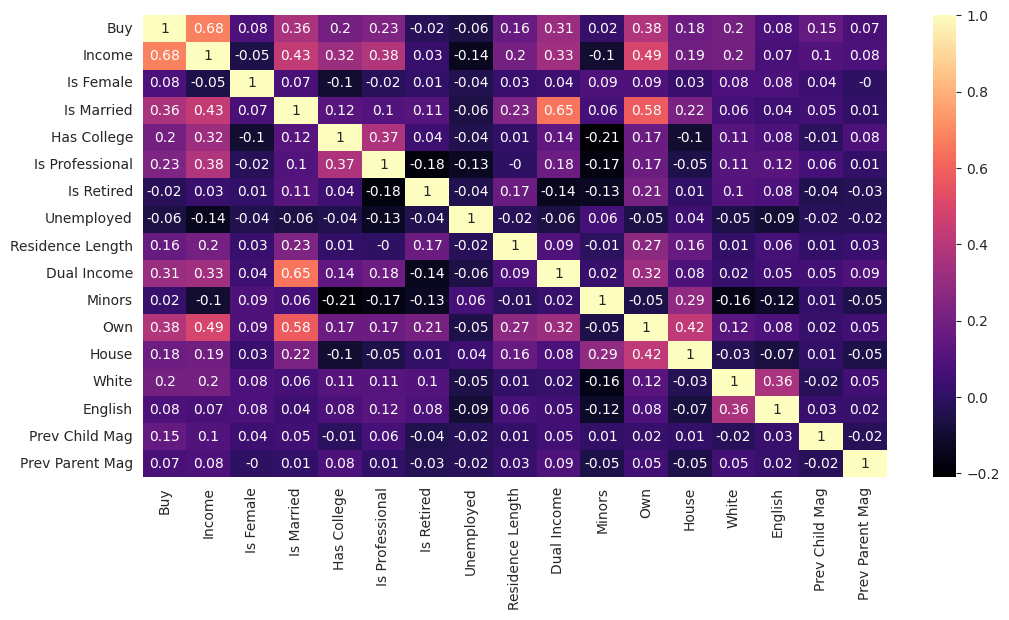

In [ ]:
# Muuttujien väliset korrelaatiot
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr().round(2), cmap="magma", annot=True)
plt.show()

Valitaan selittäviksi muuttujiksi neljä suurinta korrelaatiota kohdemuuttujan (ostopäätös, "Buy") kanssa: "Income", "Own", "Is Married" ja "Dual Income".

In [ ]:
X = df[["Income", "Own", "Is Married", "Dual Income"]]
y = df["Buy"]

# Opetus- ja testidataan jakaminen
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

Valitaan käytettäviksi luokittelumalleiksi:
- Logistinen regressio
- Satunnaismetsä
- Gradienttitehostus

In [ ]:
# Mallien sovitus
lrc = LogisticRegression(random_state=2)
lrc.fit(X_train, y_train)

rfc = RandomForestClassifier(max_depth=3, random_state=2)
rfc.fit(X_train, y_train)

gbc = GradientBoostingClassifier(max_depth=3, random_state=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2)

In [ ]:
print(f"Ennusteiden tarkkuus opetusdatassa:\n"
      f"Logistinen regressio {lrc.score(X_train, y_train):.3f}\n"
      f"Satunnaismetsä {rfc.score(X_train, y_train):.3f}\n"
      f"Gradienttitehostus {gbc.score(X_train, y_train):.3f}\n")

print(f"Ennusteiden tarkkuus testidatassa:\n"
      f"Logistinen regressio {lrc.score(X_test, y_test):.3f}\n"
      f"Satunnaismetsä {rfc.score(X_test, y_test):.3f}\n"
      f"Gradienttitehostus {gbc.score(X_test, y_test):.3f}")

Ennusteiden tarkkuus opetusdatassa:
Logistinen regressio 0.933
Satunnaismetsä 0.944
Gradienttitehostus 0.958

Ennusteiden tarkkuus testidatassa:
Logistinen regressio 0.917
Satunnaismetsä 0.929
Gradienttitehostus 0.911


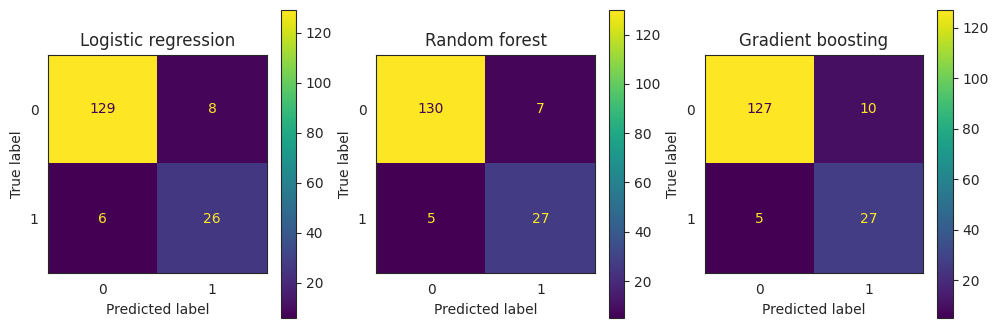

In [ ]:
# Havainnolistetaan testidatan tarkkuutta sekaannusmatriiseilla
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

cm1 = confusion_matrix(y_test, lrc.predict(X_test))
cm2 = confusion_matrix(y_test, rfc.predict(X_test))
cm3 = confusion_matrix(y_test, gbc.predict(X_test))

ConfusionMatrixDisplay(confusion_matrix=cm1).plot(ax=axs[0])
ConfusionMatrixDisplay(confusion_matrix=cm2).plot(ax=axs[1])
ConfusionMatrixDisplay(confusion_matrix=cm3).plot(ax=axs[2])

axs[0].set_title("Logistic regression")
axs[1].set_title("Random forest")
axs[2].set_title("Gradient boosting")
plt.show()

Käytetyillä muuttujilla mallien välille ei muodostu kovin suurta eroa. Otetaan mukaan vielä kaksi seuraavaksi suurinta korrelaatiota ostopäätöksen kanssa: "Is Professional" ja "Has College".

In [ ]:
X2 = df[["Income", "Own", "Is Married", "Dual Income",
         "Is Professional", "Has College"]]
y2 = df["Buy"]

# Opetus- ja testidataan jakaminen
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=2)

# Mallien sovitus
lrc2 = LogisticRegression(random_state=2)
lrc2.fit(X2_train, y2_train)

rfc2 = RandomForestClassifier(max_depth=3, random_state=2)
rfc2.fit(X2_train, y2_train)

gbc2 = GradientBoostingClassifier(max_depth=3, random_state=2)
gbc2.fit(X2_train, y2_train)

GradientBoostingClassifier(random_state=2)

In [ ]:
print(f"Ennusteiden tarkkuus opetusdatassa:\n"
      f"Logistinen regressio {lrc2.score(X2_train, y2_train):.3f}\n"
      f"Satunnaismetsä {rfc2.score(X2_train, y2_train):.3f}\n"
      f"Gradienttitehostus {gbc2.score(X2_train, y2_train):.3f}\n")

print(f"Ennusteiden tarkkuus testidatassa:\n"
      f"Logistinen regressio {lrc2.score(X2_test, y2_test):.3f}\n"
      f"Satunnaismetsä {rfc2.score(X2_test, y2_test):.3f}\n"
      f"Gradienttitehostus {gbc2.score(X2_test, y2_test):.3f}")

Ennusteiden tarkkuus opetusdatassa:
Logistinen regressio 0.935
Satunnaismetsä 0.937
Gradienttitehostus 0.966

Ennusteiden tarkkuus testidatassa:
Logistinen regressio 0.917
Satunnaismetsä 0.905
Gradienttitehostus 0.911


Edelliseen verrattuna satunnaismetsän tarkkuus huononi sekä opetus- että testidatassa, kun taas logistisen regression ja grandienttitehostuksen tarkkuus parani hieman opetusdatassa. Kokeillaan vielä ottamalla kaikki muuttujat huomioon:

In [ ]:
X3 = df.drop("Buy", axis=1)
y3 = df["Buy"]

# Opetus- ja testidataan jakaminen
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=2)

# Mallien sovitus
lrc3 = LogisticRegression(random_state=2)
lrc3.fit(X3_train, y3_train)

rfc3 = RandomForestClassifier(max_depth=3, random_state=2)
rfc3.fit(X3_train, y3_train)

gbc3 = GradientBoostingClassifier(max_depth=3, random_state=2)
gbc3.fit(X3_train, y3_train)

GradientBoostingClassifier(random_state=2)

In [ ]:
print(f"Ennusteiden tarkkuus opetusdatassa:\n"
      f"Logistinen regressio {lrc3.score(X3_train, y3_train):.3f}\n"
      f"Satunnaismetsä {rfc3.score(X3_train, y3_train):.3f}\n"
      f"Gradienttitehostus {gbc3.score(X3_train, y3_train):.3f}\n")

print(f"Ennusteiden tarkkuus testidatassa:\n"
      f"Logistinen regressio {lrc3.score(X3_test, y3_test):.3f}\n"
      f"Satunnaismetsä {rfc3.score(X3_test, y3_test):.3f}\n"
      f"Gradienttitehostus {gbc3.score(X3_test, y3_test):.3f}")

Ennusteiden tarkkuus opetusdatassa:
Logistinen regressio 0.724
Satunnaismetsä 0.944
Gradienttitehostus 0.992

Ennusteiden tarkkuus testidatassa:
Logistinen regressio 0.680
Satunnaismetsä 0.899
Gradienttitehostus 0.893


Näin tehtäessä logistinen regressio kärsii huomattavan paljon, johtuen kenties pääasiallisesti sen simplistisyydestä.

## Mallilla ennustaminen
Luodaan pieni kuvitteellinen aineisto mallilla ennustamista varten:

In [ ]:
# Tutkitaan palkkasaraketta
df["Income"].describe()

count      673.000000
mean     35078.751857
std      23812.787498
min          0.000000
25%      14000.000000
50%      32000.000000
75%      52000.000000
max      75000.000000
Name: Income, dtype: float64

In [ ]:
# Kuvitteellisen aineiston luonti
df_mock = pd.DataFrame([[67500, 1, 1, 1], [17500, 1, 1, 1], [55000, 1, 0, 0],
                        [32500, 0, 0, 1], [27500, 0, 1, 1], [64000, 1, 0, 1]],
                       columns=["Income", "Own", "Is Married", "Dual Income"])
df_mock

,Income,Own,Is Married,Dual Income
0,67500,1,1,1
1,17500,1,1,1
2,55000,1,0,0
3,32500,0,0,1
4,27500,0,1,1
5,64000,1,0,1


In [ ]:
# Satunnaismetsällä ennustaminen
rfc_pred = rfc.predict(df_mock)
rfc_prob = rfc.predict_proba(df_mock).round(2)
df_mock["Prediction"] = rfc_pred
df_mock[["Non buyer", "Buyer"]] = rfc_prob
df_mock

,Income,Own,Is Married,Dual Income,Prediction,Non buyer,Buyer
0,67500,1,1,1,1,0.16,0.84
1,17500,1,1,1,0,0.85,0.15
2,55000,1,0,0,0,0.90,0.10
3,32500,0,0,1,0,0.98,0.02
4,27500,0,1,1,0,0.94,0.06
5,64000,1,0,1,0,0.51,0.49


In [ ]:
# Edellinen solu muuttaa alkuperäistä df_mock-muuttujaa, joten luodaan uusi
# saman datan sisältävä aineisto eri nimellä
df_mock2 = pd.DataFrame([[67500, 1, 1, 1], [17500, 1, 1, 1], [55000, 1, 0, 0],
                        [32500, 0, 0, 1], [27500, 0, 1, 1], [64000, 1, 0, 1]],
                       columns=["Income", "Own", "Is Married", "Dual Income"])

# Gradienttitehostuksella ennustaminen
gbc_pred = gbc.predict(df_mock2)
gbc_prob = gbc.predict_proba(df_mock2).round(2)
df_mock2["Prediction"] = gbc_pred
df_mock2[["Non buyer", "Buyer"]] = gbc_prob
df_mock2

,Income,Own,Is Married,Dual Income,Prediction,Non buyer,Buyer
0,67500,1,1,1,1,0.02,0.98
1,17500,1,1,1,0,1.00,0.00
2,55000,1,0,0,0,0.97,0.03
3,32500,0,0,1,0,1.00,0.00
4,27500,0,1,1,0,1.00,0.00
5,64000,1,0,1,0,0.59,0.41


Mallien ennusteista käy ilmi, että gradienttitehostus tuntuu olevan "itsevarmempi" kuin satunnaismetsä. Aiemmissa soluissa käytyjen tarkkuuksien perusteella gradienttitehostus tuntuu olevan parempi, mitä enemmän muuttujia on käytössä ja mitä suurempi data on kyseessä (opetusdata vs. testidata). Mallien absoluuttista paremmuutta on varsin vaikea arvioida, mutta ainakin omaan silmääni nuo satunnaismetsän ennusteet näyttävät "fiksummilta": ei mennä välttämättä niin lähelle nollaa tai satasta kuin gradienttitehostuksella.

# Osa 2 - regressiomalli
Käytetään tässä osiossa aineistoa, jossa on dataa betonin lujuuteen vaikuttavista tekijöistä.

In [ ]:
df2 = pd.read_excel("Concrete_Data.xlsx").dropna()
df2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Muistilista muuttujista
Kirjataan alkuperäisessä aineistossa esitetyt sarakenimet ylös ennen niiden uudelleennimeämistä:
- Cement (component 1)(kg in a m^3 mixture)
- Blast Furnace Slag (component 2)(kg in a m^3 mixture)
- Fly Ash (component 3)(kg in a m^3 mixture)
- Water (component 4)(kg in a m^3 mixture)
- Superplasticizer (component 5)(kg in a m^3 mixture)
- Coarse Aggregate (component 6)(kg in a m^3 mixture)
- Fine Aggregate (component 7)(kg in a m^3 mixture)
- Age (day)
- Concrete compressive strength(MPa, megapascals)

In [ ]:
df2.columns = ["Cement", "Blast Furnace Slag", "Fly Ash",
               "Water", "Superplasticizer", "Coarse Aggregate",
               "Fine Aggregate", "Age", "Concrete compressive strength"]

df2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


Selitettäväksi muuttujaksi haluamme tuon viimeisen sarakkeen, eli betonin lujuuden. Sen tunnusluvut:

In [ ]:
df2["Concrete compressive strength"].describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: Concrete compressive strength, dtype: float64

In [ ]:
# Aineiston korrelaatiot
df2.corr().round(4)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
Cement,1.0000,-0.2752,-0.3975,-0.0815,0.0928,-0.1094,-0.2227,0.0819,0.4978
Blast Furnace Slag,-0.2752,1.0000,-0.3236,0.1073,0.0434,-0.2840,-0.2816,-0.0442,0.1348
Fly Ash,-0.3975,-0.3236,1.0000,-0.2570,0.3773,-0.0100,0.0791,-0.1544,-0.1058
Water,-0.0815,0.1073,-0.2570,1.0000,-0.6575,-0.1823,-0.4506,0.2776,-0.2896
Superplasticizer,0.0928,0.0434,0.3773,-0.6575,1.0000,-0.2663,0.2225,-0.1927,0.3661
Coarse Aggregate,-0.1094,-0.2840,-0.0100,-0.1823,-0.2663,1.0000,-0.1785,-0.0030,-0.1649
Fine Aggregate,-0.2227,-0.2816,0.0791,-0.4506,0.2225,-0.1785,1.0000,-0.1561,-0.1672
Age,0.0819,-0.0442,-0.1544,0.2776,-0.1927,-0.0030,-0.1561,1.0000,0.3289
Concrete compressive strength,0.4978,0.1348,-0.1058,-0.2896,0.3661,-0.1649,-0.1672,0.3289,1.0000


Lujuuden kanssa voimakkaimmin korreloivat sementti, vesi, pehmitin ja ikä. Valitaan nämä selittäviksi muuttujiksi.
### Lineaarinen regressio

In [ ]:
X4 = df2[["Cement", "Water", "Superplasticizer", "Age"]]
y4 = df2["Concrete compressive strength"]

# Opetus- ja testidataan jakaminen
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=2)

# Lineaarisen regression malli
lrm = LinearRegression().fit(X4_train, y4_train)
print(f"Opetusdatan selitysaste: {lrm.score(X4_train, y4_train)}\n"
      f"Testidatan selitysaste: {lrm.score(X4_test, y4_test)}")

Opetusdatan selitysaste: 0.505621364032264
Testidatan selitysaste: 0.4677826082726728


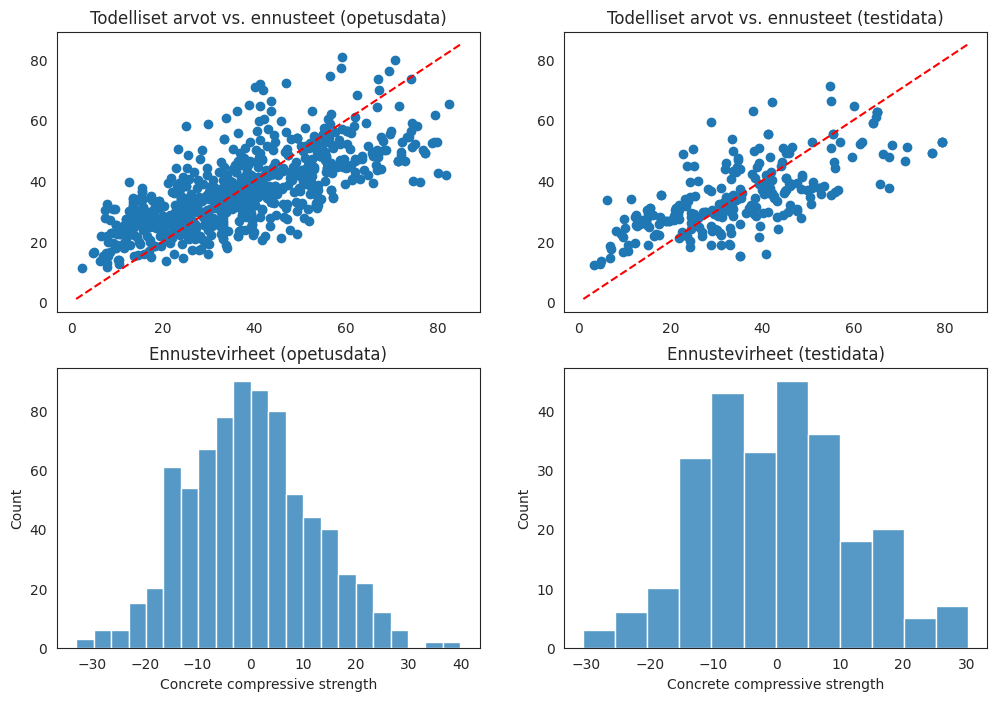

In [ ]:
# Ennusteiden laskeminen
lrm_train_pred = lrm.predict(X4_train)
lrm_test_pred = lrm.predict(X4_test)

# Ennustevirheet
lrm_train_errors = y4_train - lrm_train_pred
lrm_test_errors = y4_test - lrm_test_pred

# Ennusteiden ja todellisten arvojen vertailu graafisesti
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0][0].scatter(y4_train, lrm_train_pred)
axs[0][0].plot([1,85],[1,85],"r--")
axs[0][0].set_title("Todelliset arvot vs. ennusteet (opetusdata)")

axs[0][1].scatter(y4_test, lrm_test_pred)
axs[0][1].plot([1,85],[1,85],"r--")
axs[0][1].set_title("Todelliset arvot vs. ennusteet (testidata)")

sns.histplot(lrm_train_errors, ax=axs[1][0])
axs[1][0].set_title("Ennustevirheet (opetusdata)")
sns.histplot(lrm_test_errors, ax=axs[1][1])
axs[1][1].set_title("Ennustevirheet (testidata)")
plt.show()

Malli ei tunnu kovin vahvalta. Katsotaan vielä, jos kaikki muuttujat huomioiden pääsisimme parempaan selitysasteeseen.

In [ ]:
X_all = df2[["Cement", "Blast Furnace Slag", "Fly Ash",
          "Water", "Superplasticizer", "Coarse Aggregate",
          "Fine Aggregate", "Age"]]
y_all = df2["Concrete compressive strength"]

# Opetus- ja testidataan jakaminen
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, random_state=2)

# Lineaarisen regression malli
lrm_all = LinearRegression().fit(X_all_train, y_all_train)
print(f"Opetusdatan selitysaste: {lrm_all.score(X_all_train, y_all_train)}\n"
      f"Testidatan selitysaste: {lrm_all.score(X_all_test, y_all_test)}")

Opetusdatan selitysaste: 0.623661082393512
Testidatan selitysaste: 0.5814505360737272


Näemmä varsin selkeästi parempaan. Kuvataan tämä vielä edellisten kaavioiden tapaan:

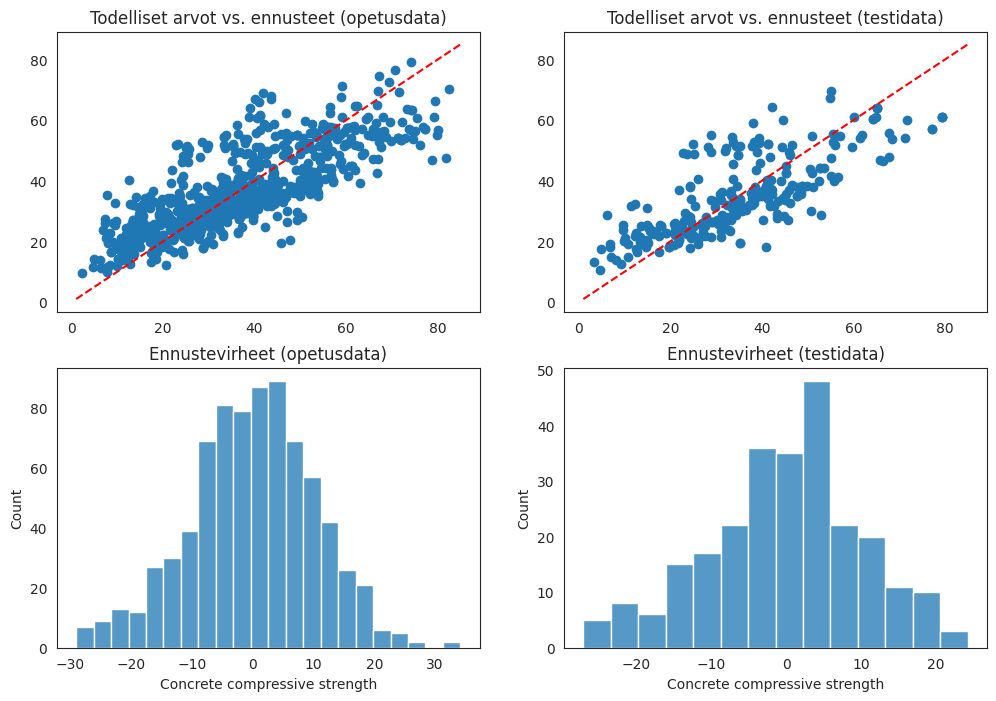

In [ ]:
# Ennusteiden laskeminen
lrm_train_pred_all = lrm_all.predict(X_all_train)
lrm_test_pred_all = lrm_all.predict(X_all_test)

# Ennustevirheet
lrm_train_errors_all = y_all_train - lrm_train_pred_all
lrm_test_errors_all = y_all_test - lrm_test_pred_all

# Ennusteiden ja todellisten arvojen vertailu graafisesti
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0][0].scatter(y_all_train, lrm_train_pred_all)
axs[0][0].plot([1,85],[1,85],"r--")
axs[0][0].set_title("Todelliset arvot vs. ennusteet (opetusdata)")

axs[0][1].scatter(y_all_test, lrm_test_pred_all)
axs[0][1].plot([1,85],[1,85],"r--")
axs[0][1].set_title("Todelliset arvot vs. ennusteet (testidata)")

sns.histplot(lrm_train_errors_all, ax=axs[1][0])
axs[1][0].set_title("Ennustevirheet (opetusdata)")
sns.histplot(lrm_test_errors_all, ax=axs[1][1])
axs[1][1].set_title("Ennustevirheet (testidata)")
plt.show()

Etenkin ennustevirheiden kuvaajista tuli hieman fiksumman näköiset.
### Gradienttitehostus
Tutkitaan vielä lopuksi mitä saamme aikaan eri regressiomallilla. Aloitetaan samalla neljän vahvimman korrelaation muuttujalla, minkä jälkeen katsotaan tulosta kaikilla muuttujilla.

In [ ]:
gbr = GradientBoostingRegressor().fit(X4_train, y4_train)
gbr_all = GradientBoostingRegressor().fit(X_all_train, y_all_train)
print(f"Neljällä muuttujalla:\n"
      f"Opetusdatan selitysaste: {gbr.score(X4_train, y4_train)}\n"
      f"Testidatan selitysaste: {gbr.score(X4_test, y4_test)}\n\n"
      f"Kaikilla muuttujilla:\n"
      f"Opetusdatan selitysaste: {gbr_all.score(X_all_train, y_all_train)}\n"
      f"Testidatan selitysaste: {gbr_all.score(X_all_test, y_all_test)}")

Neljällä muuttujalla:
Opetusdatan selitysaste: 0.8885372042848074
Testidatan selitysaste: 0.8265616667395697

Kaikilla muuttujilla:
Opetusdatan selitysaste: 0.9501115659304866
Testidatan selitysaste: 0.8922875138089444


Ero lineaarisen regression malliin on huomattavan suuri, aiemmat lukemat:
- Neljällä muuttujalla:
  - 0.5056 ja 0.4677
- Kaikilla muuttujilla:
  - 0.6236 ja 0.5814

Esitetään uuden mallin tulokset samaan graafiseen tapaan, ensiksi neljällä muuttujalla:

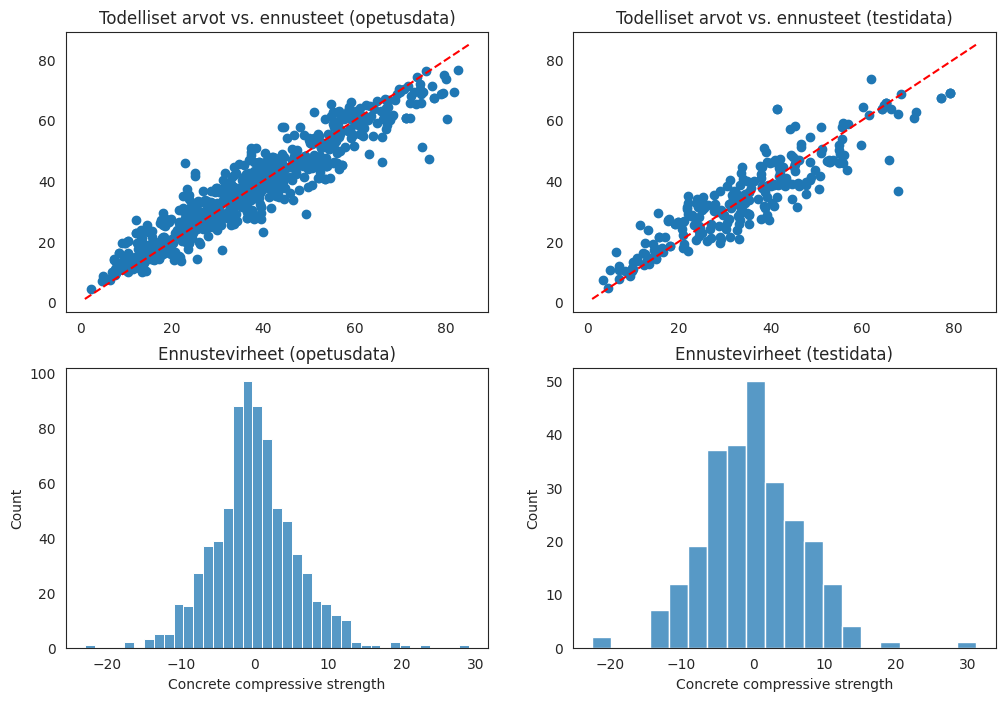

In [ ]:
# Ennusteet
gbr_train_pred = gbr.predict(X4_train)
gbr_test_pred = gbr.predict(X4_test)

# Ennustevirheet
gbr_train_errors = y4_train - gbr_train_pred
gbr_test_errors = y4_test - gbr_test_pred

# Ennusteiden ja todellisten arvojen vertailu graafisesti
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0][0].scatter(y4_train, gbr_train_pred)
axs[0][0].plot([1,85],[1,85],"r--")
axs[0][0].set_title("Todelliset arvot vs. ennusteet (opetusdata)")

axs[0][1].scatter(y4_test, gbr_test_pred)
axs[0][1].plot([1,85],[1,85],"r--")
axs[0][1].set_title("Todelliset arvot vs. ennusteet (testidata)")

sns.histplot(gbr_train_errors, ax=axs[1][0])
axs[1][0].set_title("Ennustevirheet (opetusdata)")
sns.histplot(gbr_test_errors, ax=axs[1][1])
axs[1][1].set_title("Ennustevirheet (testidata)")
plt.show()

...ja sitten kaikilla muuttujilla:

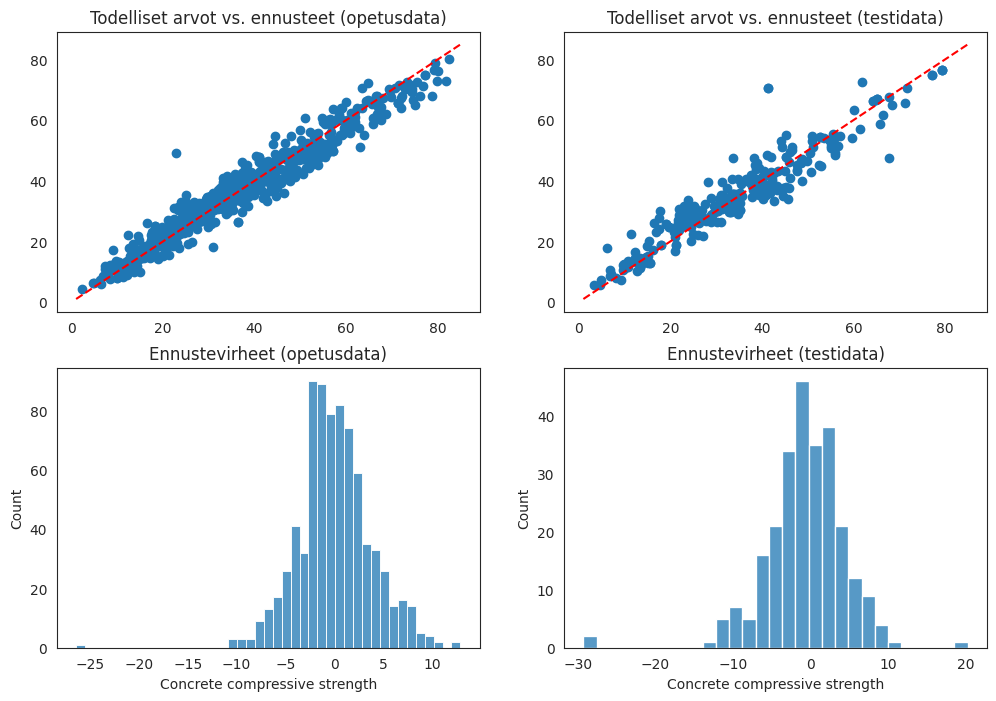

In [ ]:
# Ennusteiden laskeminen
gbr_train_pred_all = gbr_all.predict(X_all_train)
gbr_test_pred_all = gbr_all.predict(X_all_test)

# Ennustevirheet
gbr_train_errors_all = y_all_train - gbr_train_pred_all
gbr_test_errors_all = y_all_test - gbr_test_pred_all

# Ennusteiden ja todellisten arvojen vertailu graafisesti
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0][0].scatter(y_all_train, gbr_train_pred_all)
axs[0][0].plot([1,85],[1,85],"r--")
axs[0][0].set_title("Todelliset arvot vs. ennusteet (opetusdata)")

axs[0][1].scatter(y_all_test, gbr_test_pred_all)
axs[0][1].plot([1,85],[1,85],"r--")
axs[0][1].set_title("Todelliset arvot vs. ennusteet (testidata)")

sns.histplot(gbr_train_errors_all, ax=axs[1][0])
axs[1][0].set_title("Ennustevirheet (opetusdata)")
sns.histplot(gbr_test_errors_all, ax=axs[1][1])
axs[1][1].set_title("Ennustevirheet (testidata)")
plt.show()

Odotetustikin gradienttitehostus suoriutui tehtävästään huomattavasti lineaarista regressiota paremmin. Selitysasteiden erot mallien välillä olivat kuitenkin yllättävän suuret, tähän lienee syynä datan rakenne (ajoittainen epälineaarisuus ja monimutkaiset suhteet muuttujien välillä, jotka gradienttitehostus osaa käsitellä tehokkaammin).